In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%xmode plain

Exception reporting mode: Plain


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import xraymaterials
from xraymaterials import Material

# Quick Start

`xraymaterials` calculates optical properties of mixtures of elements at energies in the low keV range, using material properties from NIST's FFAST database and ICRU-44 database.

The `Material` class is the easiest way to use `xraymaterials`.  `Material` represents a material by its constituent elements and their mass densities.  It has no understanding of chemical properties of materials.  In the x-ray regime, optical properties can be predicted on the basis of atomic numbers and number densities of atoms.

`Materials` can be created, changed and added in ways to represent elements, compounds, and mixtures of compounds.

A `Material` can calculate its own
- complex refractive index ($n = 1 - \delta - i\beta$)
- total attenuation coefficient $\mu$
- photoelectric part of attenuation, $\mu_\textrm{PE}$
- K-shell part of photoelectric attenuation, $\mu_\textrm{K}$
- total scattering cross-section, $\sigma$

The two figures below demonstrate how to obtain $\delta$, $\beta$ and $\mu$ for water using either the chemical formula or the ICRU-44 decomposition.

Text(0.5,1,'Optical properties of water')

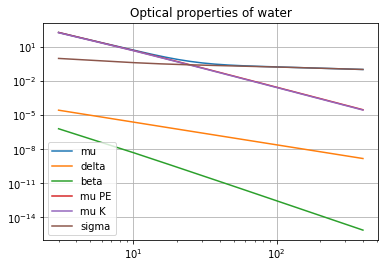

In [4]:
water = Material.from_compound("H2O", 1.0)
energy_keV = np.logspace(np.log10(3.0), np.log10(400.0), 200)

plt.loglog(energy_keV, water.mu(energy_keV), label='mu')
plt.loglog(energy_keV, water.delta(energy_keV), label='delta')
plt.loglog(energy_keV, water.beta(energy_keV), label='beta')
plt.loglog(energy_keV, water.mu_pe(energy_keV), label='mu PE')
plt.loglog(energy_keV, water.mu_pe_k(energy_keV), label='mu K')
plt.loglog(energy_keV, water.sigma(energy_keV), label='sigma')
plt.grid()
plt.legend(loc='best')
plt.title("Optical properties of water")

Text(0.5,1,'ICRU water')

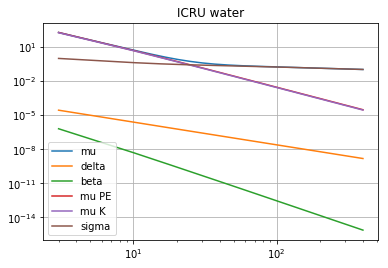

In [14]:
water = Material.from_icru44("Water, Liquid")

plt.loglog(energy_keV, water.mu(energy_keV), label='mu')
plt.loglog(energy_keV, water.delta(energy_keV), label='delta')
plt.loglog(energy_keV, water.beta(energy_keV), label='beta')
plt.loglog(energy_keV, water.mu_pe(energy_keV), label='mu PE')
plt.loglog(energy_keV, water.mu_pe_k(energy_keV), label='mu K')
plt.loglog(energy_keV, water.sigma(energy_keV), label='sigma')
plt.grid()
plt.legend()
plt.title("ICRU water")

Text(0.5,1,'Bone and water from ICRU-44')

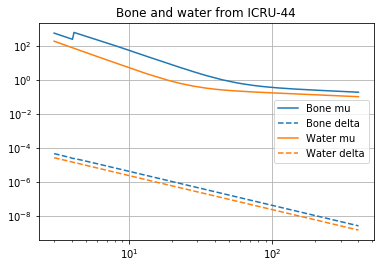

In [24]:
bone = Material.from_icru44("Bone, Cortical (ICRU-44)")

plt.loglog(energy_keV, bone.mu(energy_keV), 'C0-', label='Bone mu')
plt.loglog(energy_keV, bone.delta(energy_keV), 'C0--', label='Bone delta')
plt.loglog(energy_keV, water.mu(energy_keV), 'C1-', label='Water mu')
plt.loglog(energy_keV, water.delta(energy_keV), 'C1--', label='Water delta')
plt.grid()
plt.legend(loc='best')
plt.title('Bone and water from ICRU-44')

# Exploring materials

A material is just a list of atomic numbers and densities.  `Material` supports several type conversions and means of creation.

In [10]:
triolein = Material.from_compound("C57H104O6", 0.91)
triolein # Jupyter will show its string representation for us:

{'C': 0.7036056600435273, 'H': 0.10773434338937311, 'O': 0.09865999656709969}

In [11]:
# Convert triolein to a dict:
triolein.to_dict()

{1: 0.10773434338937311, 6: 0.7036056600435273, 8: 0.09865999656709969}

In [12]:
# Convert triolein to an array.  xraymaterials supports 99 elements, and materials can be represented by
# 99-element arrays.  The Nth array element represents atomic number N+1.  Let's look at the first ten
# elements of triolein:
triolein.to_array()[:10]

array([0.10773434, 0.        , 0.        , 0.        , 0.        ,
       0.70360566, 0.        , 0.09866   , 0.        , 0.        ])

In [13]:
# Or print the atomic numbers and densities out directly:
print(triolein.z)
print(triolein.g_cc)

[6, 1, 8]
[0.7036056600435273, 0.10773434338937311, 0.09865999656709969]


In [14]:
# We can make new materials by filtering elements from existing materials.  Refer to elements by their atomic
# numbers or atomic symbols interchangeably.

triolein_hydrogen = triolein["H"]
triolein_hydrogen_oxygen = triolein[["H", "O"]]
triolein_carbon = triolein[6]

print("H part:", triolein_hydrogen)
print("H,O part:", triolein_hydrogen_oxygen)
print("C part:", triolein_carbon)

H part: {'H': 0.10773434338937311}
H,O part: {'H': 0.10773434338937311, 'O': 0.09865999656709969}
C part: {'C': 0.7036056600435273}


In [15]:
# We can reassemble triolein from its parts because the + operator adds densities.
print("H,O + C:\n", triolein_hydrogen_oxygen + triolein_carbon)
print("original triolein:\n", triolein)

H,O + C:
 {'H': 0.10773434338937311, 'C': 0.7036056600435273, 'O': 0.09865999656709969}
original triolein:
 {'C': 0.7036056600435273, 'H': 0.10773434338937311, 'O': 0.09865999656709969}


In [53]:
# It may be fun to filter one material by the atomic numbers present in another material.
# Look for this idiom in the saltwater examples below.
print(triolein[water.z])

{'H': 0.10773434338937311, 'O': 0.09865999656709969}


In [54]:
# We can fluff up a material with some air.  The as_density() function derives a new material
# from an existing material by changing its density.
triolein_light = triolein.as_density(0.25)
print("Fluffy triolein:\n", triolein_light)

# We can also make it more dense again.  Changing the material density changes its elements' densities in-place:
triolein_light.density = 0.91
print("Heavy again:\n", triolein_light)

Fluffy triolein:
 {'C': 0.19329825825371627, 'H': 0.02959734708499261, 'O': 0.02710439466129112}
Heavy again:
 {'C': 0.7036056600435272, 'H': 0.1077343433893731, 'O': 0.09865999656709967}


# Mixtures of materials

Complicated materials can be created by mixing simpler materials.  We may know the composition of a substance of interest as a chemical formula, or fractions by mass, or fractions by volume (in the case of homemade food products).  `xraymaterials` can mix materials in parts by volume or mass, as may be applicable in these situations.

The density of a mixture of materials cannot be predicted from its parts alone, as evidenced by water (its density at STP could never be inferred from the densities of hydrogen and oxygen at STP).  For granular materials such as pancake mix or wet sand, the volume of the mixture will depend on the shapes of constituent particles.  `xraymaterials` makes no attempt to infer the densities resulting from mixtures of materials.  Instead it provides several ways for client code to _set_ the density of a mixture to a known value after mixing components.

`Material` supports add by volume and add by mass.  Some example uses:

- `Material.add_by_volume()`: Suitable for recipes with units such as cups, tablespoons, or milliliters.  For many materials at once, use `sum_by_volume()`.
- `Material.add_by_mass()`: Suitable for metal alloys.  For many materials at once, use `sum_by_mass()`.
- Water-based solutions are often quoted in grams per liter.  `add_by_mass()` is recommended, using 1 kg/L for water.

In a typical case, after mixing materials, we will set the density of the resulting mixture to a known value.

In [27]:
# Example: saltwater

water = Material.from_compound("H2O", 1.0)
salt = Material.from_compound("NaCl", 2.16)  # Density of table salt is roughly 2.16 g/cc

# At 20°C, a liter of water can dissolve 357 grams of salt.  Make such a mixture:
saline_naive = Material.add_by_mass(water, 1.0, salt, 0.357)

# According to Wikipedia, the density of such a saturated mixture is 1.193 g/cc.  This
# cannot be predicted by xraymaterials so we must set it manually.
saline = saline_naive.as_density(1.193)

# Compare the densities of the two mixtures:
print("With volume conservation, the density of saturated saltwater would be {0:0.3f} g/cc.".format(saline_naive.density))
print("The fraction by mass of salt should be {0:0.3f}%.".format(100*saline_naive[salt.z].density / saline_naive.density))
print("The true density is known to be", saline.density, "g/cc.")
print("Volume has decreased by {0:0.3f}% due to intermolecular forces!".format(100*(1-saline_naive.density/saline.density)))
print("The fraction by mass of salt is the same: {0:0.3f}%.".format(100*saline[salt.z].density / saline.density))

With volume conservation, the density of saturated saltwater would be 1.165 g/cc.
The fraction by mass of salt should be 26.308%.
The true density is known to be 1.193 g/cc.
Volume has decreased by 2.386% due to intermolecular forces!
The fraction by mass of salt is the same: 26.308%.


In [28]:
# As a convenience we can adjust the density of a Material in place.

saline_naive = Material.add_by_mass(water, 1.0, salt, 0.357)
print("Correct the density of saline_naive.  Originally:", saline_naive.density)
print("\tComposition:", str(saline_naive))
saline_naive.density = 1.193
print("Now its density is", saline_naive.density)
print("\tComposition:", str(saline_naive))

Correct the density of saline_naive.  Originally: 1.1645292014302742
	Composition: {'H': 0.09602718442443739, 'O': 0.7621372971011884, 'Na': 0.12051541100331639, 'Cl': 0.185849308901332}
Now its density is 1.193
	Composition: {'H': 0.09837488907762103, 'O': 0.7807702840985029, 'Na': 0.12346181199266813, 'Cl': 0.1903930148312081}



=== Alloys ===
Density of naval brass: 8.0
Density of phosphor bronze: 8.700000000000001
Density of stainless steel: 7.699999999999999


Text(0.5,1,'Refractive index decrement')

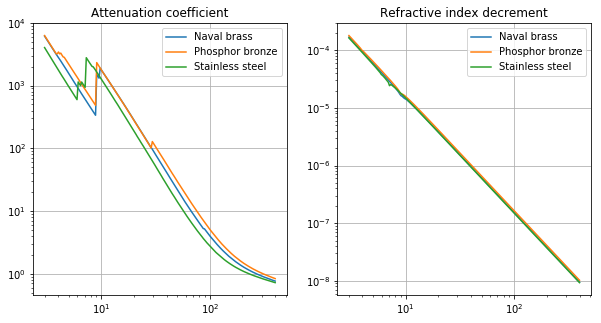

In [29]:
# Example: Brass, bronze, stainless steel
# I think alloys conserve volume pretty well but I'm not sure.

copper = Material.from_element("Cu")
zinc = Material.from_element("Zn")
tin = Material.from_element("Sn")
phosphorus = Material.from_element("P")
nickel = Material.from_element("Ni")
chromium = Material.from_element("Cr")
carbon = Material.from_element("C")
iron = Material.from_element("Fe")
lead = Material.from_element("Pb")
silicon = Material.from_element("Si")
manganese = Material.from_element("Mn")

# https://www.makeitfrom.com/material-properties/As-Forged-and-Air-Cooled-M10-C46400-Brass
naval_brass = Material.sum_by_mass([lead, tin, zinc, copper], [0.5, 0.5, 38, 61], final_density_g_cc=8.0)

# https://www.makeitfrom.com/material-properties/EN-CC481K-CuSn11P-C-Phosphor-Bronze
phosphor_bronze = Material.sum_by_mass([tin, phosphorus, copper], [11.0, 1.0, 88.0], final_density_g_cc=8.7)

# https://www.makeitfrom.com/material-properties/Half-Hard-201-Stainless-Steel
stainless_steel = Material.sum_by_mass([silicon, nickel, manganese, chromium, iron], [0.5, 4.5, 6.5, 17, 71.5], final_density_g_cc=7.7)

print("\n=== Alloys ===")
print("Density of naval brass:", naval_brass.density)
print("Density of phosphor bronze:", phosphor_bronze.density)
print("Density of stainless steel:", stainless_steel.density)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.loglog(energy_keV, naval_brass.mu(energy_keV), 'C0-', label='Naval brass')
plt.plot(energy_keV, phosphor_bronze.mu(energy_keV), 'C1-', label='Phosphor bronze')
plt.plot(energy_keV, stainless_steel.mu(energy_keV), 'C2-', label='Stainless steel')
# plt.plot(energy_keV, tin.mu(energy_keV), 'C3-', label='Tin')
plt.grid()
plt.legend(loc='best')
plt.title('Attenuation coefficient')

plt.subplot(122)
plt.loglog(energy_keV, naval_brass.delta(energy_keV), 'C0-', label='Naval brass')
plt.plot(energy_keV, phosphor_bronze.delta(energy_keV), 'C1-', label='Phosphor bronze')
plt.plot(energy_keV, stainless_steel.delta(energy_keV), 'C2-', label='Stainless steel')
plt.grid()
plt.legend(loc='best')
plt.title('Refractive index decrement')

# List ICRU-44 materials

These are the valid material names for `Material.from_icru44()`.


In [30]:
xraymaterials.icru44.list()

['A-150 Tissue-Equivalent Plastic',
 'Adipose Tissue (ICRU-44)',
 'Air, Dry (near sea level)',
 'Alanine',
 'B-100 Bone-Equivalent Plastic',
 'Bakelite',
 'Blood, Whole (ICRU-44)',
 'Bone, Cortical (ICRU-44)',
 'Brain, Grey/White Matter (ICRU-44)',
 'Breast Tissue (ICRU-44)',
 'C-552 Air-equivalent Plastic',
 'Cadmium Telluride',
 'Calcium Fluoride',
 'Calcium Sulfate',
 '15 mmol L-1 Ceric Ammonium Sulfate Solution',
 'Cesium Iodide',
 'Concrete, Ordinary',
 'Concrete, Barite (TYPE BA)',
 'Eye Lens (ICRU-44)',
 'Ferrous Sulfate Standard Fricke',
 'Gadolinium Oxysulfide',
 'Gafchromic Sensor',
 'Gallium Arsenide',
 'Glass, Borosilicate (Pyrex)',
 'Glass, Lead',
 'Lithium Fluride',
 'Lithium Tetraborate',
 'Lung Tissue (ICRU-44)',
 'Magnesium Tetroborate',
 'Mercuric Iodide',
 'Muscle, Skeletal (ICRU-44)',
 'Ovary (ICRU-44)',
 'Photographic Emulsion (Kodak Type AA)',
 'Photographic Emulsion  (Standard Nuclear)',
 'Plastic Scintillator, Vinyltoluene',
 'Polyethylene',
 'Polyethylene Terep